In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split


- Theory based on Introduction to Statistical Learning Python
- Figure 1 taken from [this](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html) sklearn example

### Hyperplanes and Maximal Margin Classifiers

- The formula of a hyperplane in a $p$-dimensional setting:
$$\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p = 0$$

- Classification (binary) using a hyperplane is performed by checking the sign of the left-hand side of the formula above

- In case of perfectly separable classess, the 'best' hyperplane is is the *maximal margin hyperplane*, which has the farthest minimum distance to the training observations as shown in the figure below

- The *support vectors* are the training observations that define the maximal margin hyperplane, shown as encircled dots in the figure below. If we would move one of these points, the hyperplane would change

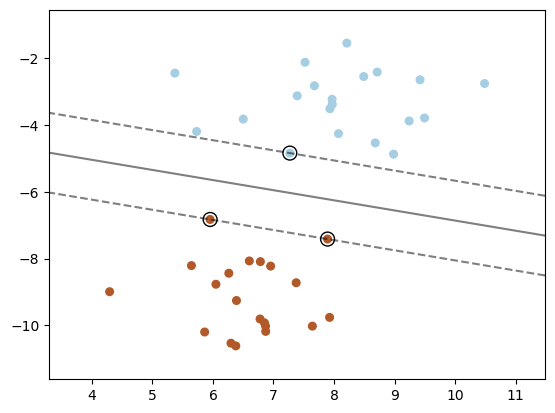

In [7]:
# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

### Support Vector Classifier

*Briefly explained: allow observations to be on the incorrect side of the margin line and hyperplane*

Where for *Maximal Margin Classifiers* we're looking for the largest minimal margin for observations close to the separating hyperplane, for Support Vector Classifiers, we allow a *soft margin*, which means that we allow some of the observations to be on the incorrect side of the margin or even on the incorrect side of the hyperplane, to achieve greater robustness. In some cases, a collection of points is not perfectly separable, and onbservations on the wrong side of the hyperplane are inevitable.

How do we achieve soft margins?
By adding slack variables and a tuning parameter
- The slack variables, $\epsilon_1, ..., \epsilon_i$ (distrance from the margin line), allow observations to be on the incorrect side of the margin lines and even the hyperplane
- Tuning parameter $C$ is the allowed sum of slack parameters. When $C$ is large, the margin is wide, many observations are involved in determining the hyperplane[^1]. In contrast, if $C$ is small, there will be fewer observations that define the hyperplane (support vectors).
- $C$ is generally chosen by cross validation
- Support vector classifiers are robust to observations that are far away from the hyperplane

[^1]: *In the sklearn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for `sklearn.svm.SVC`, we can find: "Regularization parameter. The strength of the regularization is inversely proportional to C" which is opposite to its definition in ISLP*

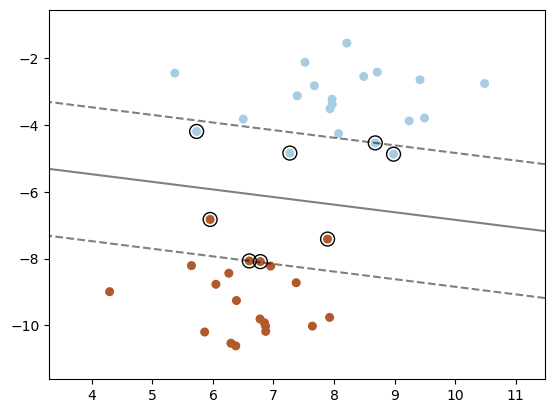

In [8]:
C = 0.05

clf = svm.SVC(kernel="linear", C=C)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

### Support Vector Machines

In a case of a non-linear relationship between predictors and the outcome, we can consider enlarging the feature space using functions of the predictors to address this linearity (similar to what we do when adding polynomial features to linear regression). The *Support Vector Machine* allows us to enlarge the feature space used by the *Support Vector Classifier* in a way that leads to efficient computations (when enlarging the feature space with many predictors, computation demand might increase significantly)

SVMs address this issue by enlarging the feature space using functions of the predictors, such as polynomial and radial basis functions. This process, known as the kernel trick, allows us to transform the data into a higher-dimensional space where it becomes linearly separable. 

The beauty of SVMs is that despite the increase in the dimensionality of the feature space, they manage to maintain computational efficiency. This is because they only need to compute the dot products between the transformed feature vectors, rather than explicitly computing the coordinates of the data in the enlarged feature space. 

Once the data is transformed and becomes linearly separable, the SVM then finds the hyperplane that maximizes the margin between the classes, just like the SVC does in the original feature space.

Information in this cell is taken from sklearn [documentation](https://scikit-learn.org/stable/modules/svm.html)

The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:
- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

### Testing with Titanic data

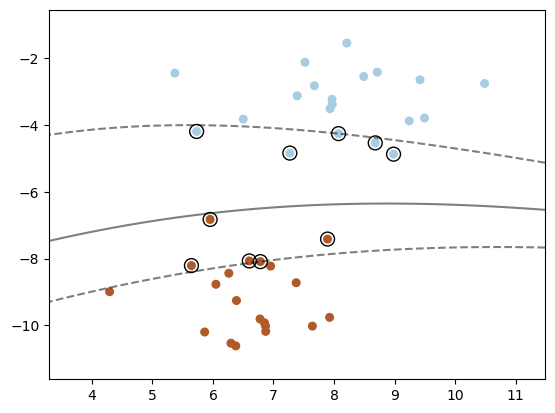

In [10]:
C = 1
clf = svm.SVC(kernel="poly", C=C)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()